## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [7]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
#     Изменения
    y_pred_copy = y_pred.astype("float64").copy()
    y_pred_copy[y_pred_copy == 0] = 1e-9
    y_pred_copy[y_pred_copy == 1] = 1 - 1e-9
#     Изменения
    err = - np.mean(y * np.log(y_pred_copy) + (1.0 - y) * np.log(1.0 - y_pred_copy))
    
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0])
calc_logloss(y1, y_pred1)

9.999999722180686e-10

In [10]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0, 1])
calc_logloss(y1, y_pred1)

20.723265851087376

In [11]:
y_pred1[y_pred1 == 0] = 5

In [12]:
y_pred1.astype("float64")

array([5., 1.])

In [13]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [14]:
z = np.linspace(-10, 10, 101)

In [15]:
probabilities = sigmoid(z)

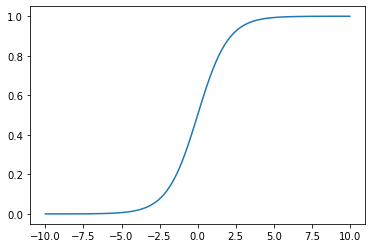

In [16]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [17]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W, err

In [18]:
model = eval_model(X_st, y, iterations=500, eta=1e-4)

## Домашнее задание <a class='anchor' id='hw'>

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [19]:
def calc_logloss(y, y_pred):
#     Изменения
    y_pred_copy = y_pred.astype("float64").copy()
    y_pred_copy[y_pred_copy == 0] = 1e-9
    y_pred_copy[y_pred_copy == 1] = 1 - 1e-9
#     Изменения
    err = - np.mean(y * np.log(y_pred_copy) + (1.0 - y) * np.log(1.0 - y_pred_copy))
    return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [20]:
from itertools import product

def iterator(func, eta_list, iter_list, X, y):
    n = X.shape[0]
    array_for_return = []
    for eta, n_iter in product(eta_list, iter_list):        
        W, err = func(X, y, n_iter, eta)
        
        print(f'Learning cycle ended with: eta={eta}, n_iter={n_iter},  W = {W}, Logloss = {round(err,2)}')
        array_for_return.append([eta, n_iter, err])    
    return np.array(array_for_return)

In [21]:
eta_list = [10**x for x in range(-2, -8, -1)]
iter_list = np.linspace(100, 1000, 5, dtype="int")

display(eta_list)
display(iter_list)

[0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]

array([ 100,  325,  550,  775, 1000])

In [22]:
np.set_printoptions(precision=2)

In [23]:
arr = iterator(eval_model, eta_list, iter_list, X, y)

/tmp/ipykernel_8079/2870899410.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


Learning cycle ended with: eta=0.01, n_iter=100,  W = [ 0.47 -0.43 -1.1   1.62], Logloss = 10.36
Learning cycle ended with: eta=0.01, n_iter=325,  W = [ 0.41 -1.05  3.33  1.86], Logloss = 10.36
Learning cycle ended with: eta=0.01, n_iter=550,  W = [ 0.34 -1.7   1.83  2.09], Logloss = 10.36
Learning cycle ended with: eta=0.01, n_iter=775,  W = [ 0.28 -2.34  0.33  2.31], Logloss = 10.36
Learning cycle ended with: eta=0.01, n_iter=1000,  W = [ 0.21 -2.99 -1.17  2.54], Logloss = 10.36
Learning cycle ended with: eta=0.001, n_iter=100,  W = [ 0.49 -0.17  0.35  1.53], Logloss = 81.02
Learning cycle ended with: eta=0.001, n_iter=325,  W = [ 0.49 -0.23 -0.11  1.55], Logloss = 10.36
Learning cycle ended with: eta=0.001, n_iter=550,  W = [ 0.48 -0.3  -0.33  1.58], Logloss = 10.36
Learning cycle ended with: eta=0.001, n_iter=775,  W = [ 0.47 -0.36 -0.13  1.6 ], Logloss = 10.36
Learning cycle ended with: eta=0.001, n_iter=1000,  W = [ 0.47 -0.42  0.42  1.62], Logloss = 48.86
Learning cycle ended wi

[(0.0, 20.0)]

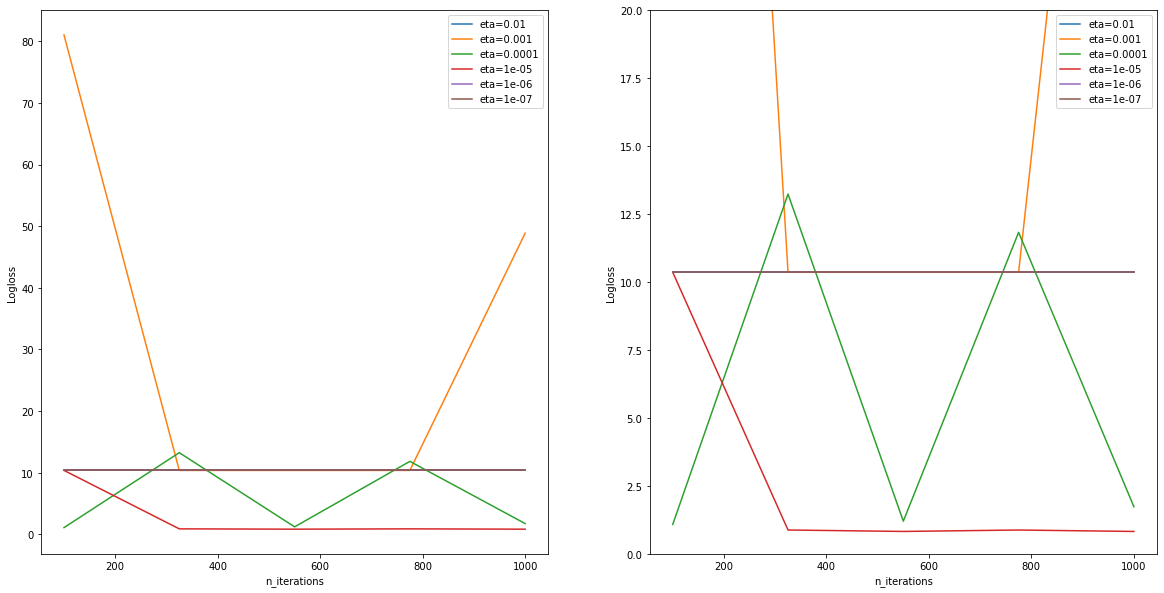

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(20)

for eta in eta_list:
    ax1.plot(arr[np.where(arr[:,0] == eta)][:,1], arr[np.where(arr[:,0] == eta)][:,2], label=f'eta={eta}')
    ax2.plot(arr[np.where(arr[:,0] == eta)][:,1], arr[np.where(arr[:,0] == eta)][:,2], label=f'eta={eta}')

for ax in (ax1, ax2):
    ax.set(xlabel='n_iterations', ylabel='Logloss')    
    ax.legend()

ax2.set(ylim=(0,20))

**Вывод:** Лучшие результаты по Logloss были получены при eta = 1e-5 и количестве итераций > 300

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [25]:
def calc_pred_proba(W, X):
    y_pred_proba = np.squeeze(sigmoid(np.dot(X, W)))
    return y_pred_proba

In [26]:
calc_pred_proba(model[0], X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [27]:
def calc_pred(W, X, threshold=0.5):
    y_pred = np.zeros(X.shape[0])
    pred = np.squeeze(sigmoid(np.dot(X, W)))
        
    for x in range(pred.shape[0]):
        if x >= threshold:
            y_pred[x] = 1
        if x < threshold:
            y_pred[x] = 0
    return y_pred

In [28]:
y_pred = calc_pred(model[0],X)

5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [29]:
def accuracy(y, y_pred):
    l = y.shape[0]
    return 1.0 / l * sum(y == y_pred)

def precision(y, y_pred):
    tp = sum(y_pred[y == 1]) 
    fp = sum(y_pred[y == 0])
    return tp / (tp + fp)

def recall(y, y_pred):
    tp = sum(y_pred[y == 1])
    fn = sum(y_pred[y == 1]==0)
    return tp / (tp + fn)

def f1_score(y, y_pred):
    p = precision(y, y_pred)
    r = recall(y, y_pred)
    return 2 * p * r / (p+r)

In [30]:
print(accuracy(y, y_pred))
print(precision(y, y_pred))
print(recall(y, y_pred))
print(f1_score(y, y_pred))

0.6000000000000001
0.5555555555555556
1.0
0.7142857142857143


6. Могла ли модель переобучиться? Почему?

Не могла, так как модель линейна